[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<Figure size 1400x700 with 0 Axes>

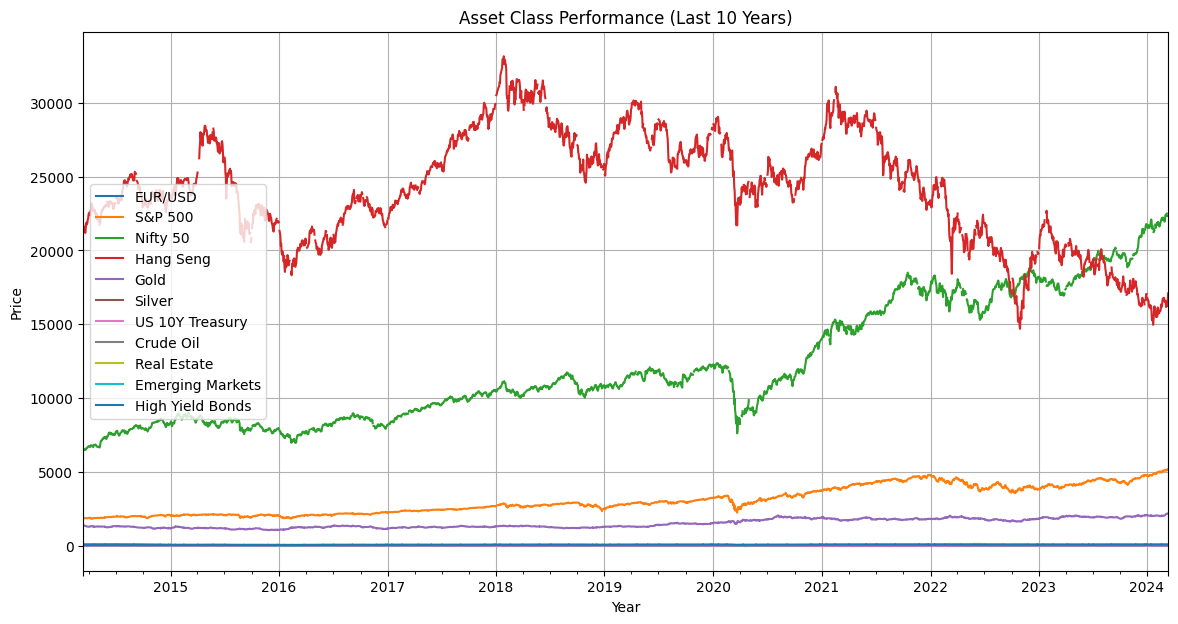

In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define asset class tickers
assets = {
    "EUR/USD": "EURUSD=X",
    "S&P 500": "^GSPC",
    "Nifty 50": "^NSEI",
    "Hang Seng": "^HSI",
    "Gold": "GC=F",
    "Silver": "SI=F",
    "US 10Y Treasury": "^TNX",
    "Crude Oil": "CL=F",
    "Real Estate": "VNQ",
    "Emerging Markets": "EEM",
    "High Yield Bonds": "HYG"
}

# Define time period
start_date = "2014-03-13"
end_date = "2024-03-13"

# Fetch historical data
asset_data = []
for asset, ticker in assets.items():
    data = yf.download(ticker, start=start_date, end=end_date)[["Close"]]
    data.columns = [asset]  # Rename column to asset name
    asset_data.append(data)

# Combine all asset data into a single DataFrame
if asset_data:
    asset_df = pd.concat(asset_data, axis=1)

    # Plot the data
    plt.figure(figsize=(14, 7))
    asset_df.plot(figsize=(14, 7), title="Asset Class Performance (Last 10 Years)")
    plt.xlabel("Year")
    plt.ylabel("Price")
    plt.grid()
    plt.legend()
    plt.show()
else:
    print("No valid data retrieved. Check the asset tickers or date range.")

/usr/local/lib/python3.11/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


<Figure size 1400x700 with 0 Axes>

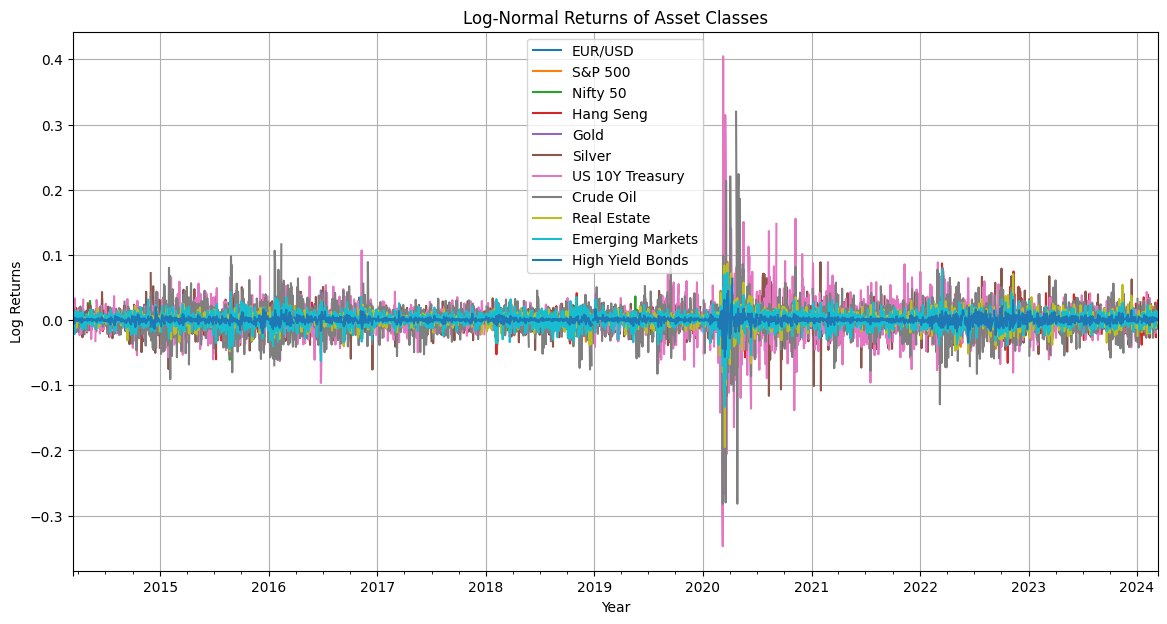

In [8]:
import numpy as np
# Calculate log-normal returns
log_returns = np.log(asset_df / asset_df.shift(1))

# Plot log-normal returns
plt.figure(figsize=(14, 7))
log_returns.plot(figsize=(14, 7), title="Log-Normal Returns of Asset Classes")
plt.xlabel("Year")
plt.ylabel("Log Returns")
plt.grid()
plt.legend()
plt.show()

Covariance Matrix of Log Returns:
                       EUR/USD       S&P 500  Nifty 50  Hang Seng      Gold  \
EUR/USD           2.486703e-05  9.751745e-07  0.000002   0.000008  0.000003   
S&P 500           9.751745e-07  1.263062e-04  0.000037   0.000030  0.000002   
Nifty 50          2.301296e-06  3.697496e-05  0.000105   0.000060 -0.000003   
Hang Seng         8.008286e-06  2.958108e-05  0.000060   0.000167  0.000003   
Gold              2.793140e-06  1.704991e-06 -0.000003   0.000003  0.000083   
Silver            4.100326e-06  2.819547e-05  0.000016   0.000030  0.000124   
US 10Y Treasury  -1.999537e-06  1.054331e-04  0.000053   0.000056 -0.000078   
Crude Oil        -3.257077e-06  8.009914e-05  0.000042   0.000042  0.000026   
Real Estate       1.454317e-06  1.105736e-04  0.000040   0.000026  0.000014   
Emerging Markets  6.304892e-07  1.116061e-04  0.000056   0.000080  0.000012   
High Yield Bonds  1.545988e-06  4.738771e-05  0.000018   0.000015  0.000005   

                 

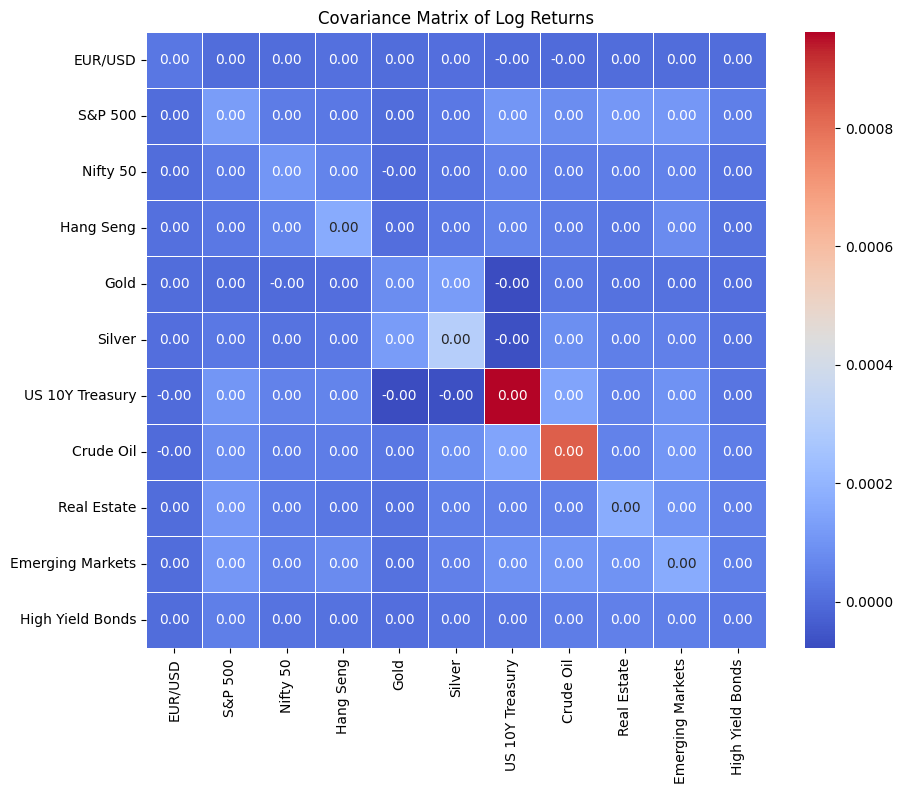

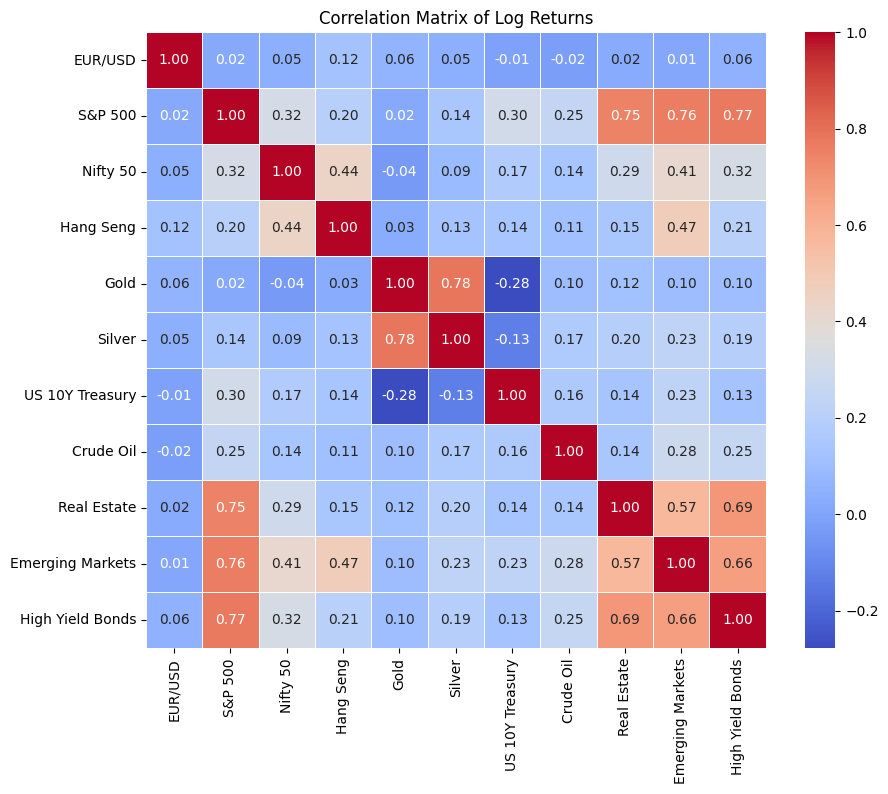

In [11]:
import seaborn as sns
# Compute and display covariance matrix of log returns
cov_matrix = log_returns.cov()
print("Covariance Matrix of Log Returns:")
print(cov_matrix)

# Compute and display correlation matrix of log returns
correlation_matrix = log_returns.corr()
print("\nCorrelation Matrix of Log Returns:")
print(correlation_matrix)

# Visualize the covariance matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, linewidths=0.5)
plt.title("Covariance Matrix of Log Returns")
plt.show()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, linewidths=0.5)
plt.title("Correlation Matrix of Log Returns")
plt.show()

/usr/local/lib/python3.11/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


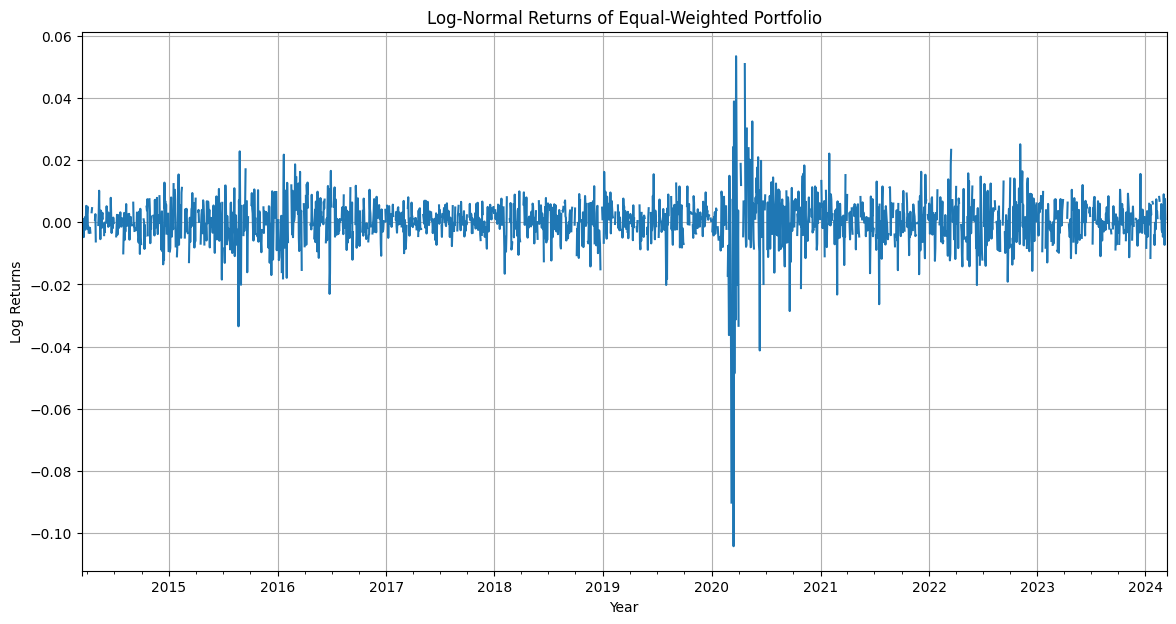

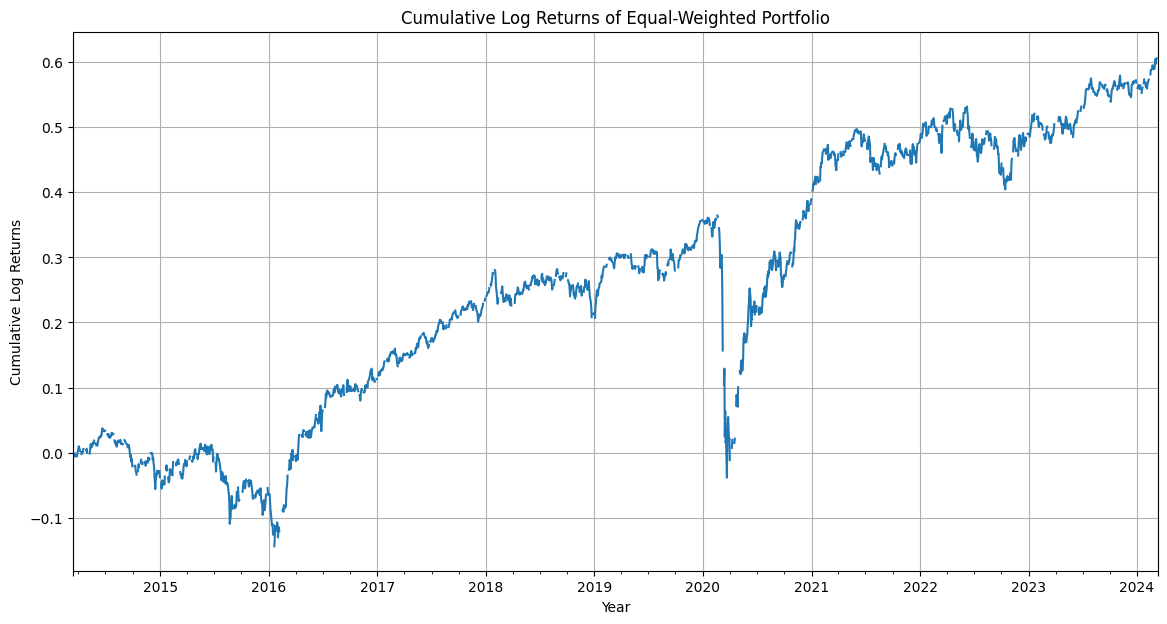

Date
2014-03-13         NaN
2014-03-14    0.001126
2014-03-17         NaN
2014-03-18         NaN
2014-03-19   -0.002349
Freq: B, dtype: float64


In [14]:
# Calculate log-normal returns for each asset (already done earlier)
log_returns = np.log(asset_df / asset_df.shift(1))

# Equal weighting of the assets
weights = np.ones(len(assets)) / len(assets)

# Calculate the portfolio returns (weighted average of individual asset returns)
portfolio_returns = log_returns.dot(weights)

# Calculate the portfolio's log returns (already in log-returns)
portfolio_log_returns = portfolio_returns

# Plot the portfolio log returns
plt.figure(figsize=(14, 7))
portfolio_log_returns.plot(figsize=(14, 7), title="Log-Normal Returns of Equal-Weighted Portfolio")
plt.xlabel("Year")
plt.ylabel("Log Returns")
plt.grid()
plt.show()

# Optionally, display the portfolio's cumulative log return over time
cumulative_portfolio_returns = portfolio_log_returns.cumsum()
plt.figure(figsize=(14, 7))
cumulative_portfolio_returns.plot(figsize=(14, 7), title="Cumulative Log Returns of Equal-Weighted Portfolio")
plt.xlabel("Year")
plt.ylabel("Cumulative Log Returns")
plt.grid()
plt.show()

# Print first few rows of portfolio log returns to verify
print(portfolio_log_returns.head())


<Figure size 1400x700 with 0 Axes>

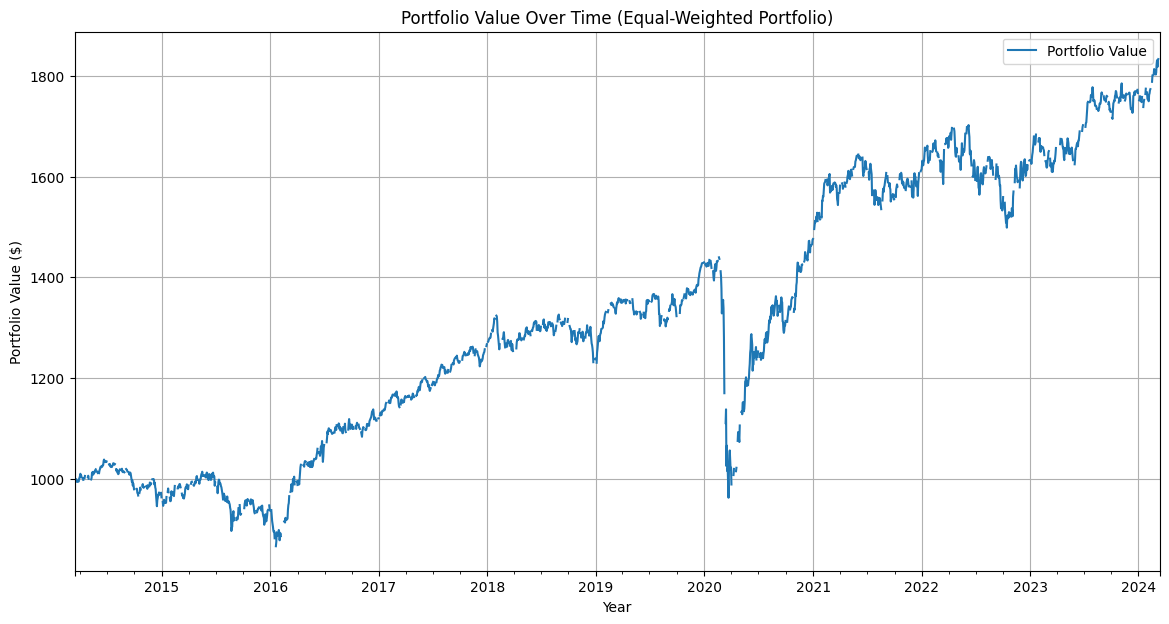

Total Return: 83.90%
Annualized Return: 6.06%
Portfolio Volatility (Annualized): 12.16%
Sharpe Ratio: 0.50
Maximum Drawdown: nan%


<ipython-input-15-5fe29c2b783d>:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_return = (portfolio_value[-1] / initial_investment) - 1  # Total return
<ipython-input-15-5fe29c2b783d>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  annualized_return = (portfolio_value[-1] / initial_investment) ** (1 / (len(portfolio_log_returns) / 252)) - 1  # Approximate annualized return (252 trading days)


In [15]:
# Set initial investment amount
initial_investment = 1000

# Calculate the portfolio value over time
portfolio_value = initial_investment * np.exp(np.cumsum(portfolio_log_returns))  # Cumulative sum of log returns gives portfolio value

# Create a DataFrame for portfolio value
portfolio_value_df = pd.DataFrame(portfolio_value, index=portfolio_log_returns_df.index, columns=["Portfolio Value"])

# Plot portfolio value over time
plt.figure(figsize=(14, 7))
portfolio_value_df.plot(figsize=(14, 7), title="Portfolio Value Over Time (Equal-Weighted Portfolio)")
plt.xlabel("Year")
plt.ylabel("Portfolio Value ($)")
plt.grid()
plt.legend()
plt.show()

# Calculate basic statistics
total_return = (portfolio_value[-1] / initial_investment) - 1  # Total return
annualized_return = (portfolio_value[-1] / initial_investment) ** (1 / (len(portfolio_log_returns) / 252)) - 1  # Approximate annualized return (252 trading days)
portfolio_volatility = np.std(portfolio_log_returns) * np.sqrt(252)  # Annualized volatility
sharpe_ratio = annualized_return / portfolio_volatility  # Sharpe ratio (using 0 risk-free rate)
rolling_max = np.maximum.accumulate(portfolio_value)  # Rolling maximum for drawdown calculation
drawdown = (portfolio_value - rolling_max) / rolling_max  # Calculate drawdown
max_drawdown = drawdown.min()  # Maximum drawdown

# Print statistics
print(f"Total Return: {total_return * 100:.2f}%")
print(f"Annualized Return: {annualized_return * 100:.2f}%")
print(f"Portfolio Volatility (Annualized): {portfolio_volatility * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Maximum Drawdown: {max_drawdown * 100:.2f}%")


In [16]:
# Calculate portfolio's mean and standard deviation of log returns
portfolio_mean_return = portfolio_log_returns.mean()  # Mean of the log returns
portfolio_std_dev = portfolio_log_returns.std()  # Standard deviation of the log returns

# Annualize mean return and standard deviation (252 trading days per year)
annualized_mean_return = portfolio_mean_return * 252
annualized_std_dev = portfolio_std_dev * np.sqrt(252)

# Print the portfolio's mean and standard deviation
print(f"Mean Daily Log Return: {portfolio_mean_return * 100:.4f}%")
print(f"Standard Deviation (Daily): {portfolio_std_dev * 100:.4f}%")
print(f"Annualized Mean Return: {annualized_mean_return * 100:.2f}%")
print(f"Annualized Standard Deviation: {annualized_std_dev * 100:.2f}%")


Mean Daily Log Return: 0.0302%
Standard Deviation (Daily): 0.7660%
Annualized Mean Return: 7.61%
Annualized Standard Deviation: 12.16%


There are NaN values in the portfolio log returns!
591
Daily VaR at different confidence levels (log returns):
{0.05: 0.010209646764418339, 0.025: 0.01301309510438068, 0.01: 0.018187180054726738, 0.005: 0.02276278033784691}
Value at Risk (VaR) in monetary terms for different time horizons and confidence levels:
{'10-day': {0.05: 322.8573788133049, 0.025: 411.51019938229535, 0.01: 575.1291318852228, 0.005: 719.8223174569332}, 'Monthly': {0.05: 467.8647911670801, 0.025: 596.3349334148373, 0.01: 833.4412927857637, 0.005: 1043.1216392583594}, 'Yearly': {0.05: 1620.7311787479705, 0.025: 2065.7648060054034, 0.01: 2887.125328461663, 0.005: 3613.479355340025}}


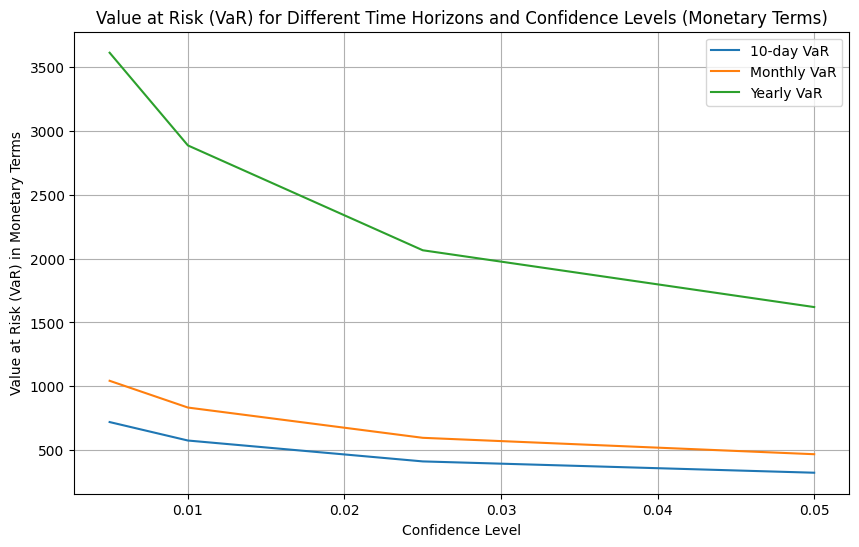

Value at Risk (VaR) for different time horizons and confidence levels (in monetary terms):
           10-day      Monthly       Yearly
0.050  322.857379   467.864791  1620.731179
0.025  411.510199   596.334933  2065.764806
0.010  575.129132   833.441293  2887.125328
0.005  719.822317  1043.121639  3613.479355


In [18]:
# Initial balance of the portfolio
initial_balance = 10000

# Check if there are NaN values in the portfolio's log returns
if portfolio_log_returns.isna().any():
    print("There are NaN values in the portfolio log returns!")
    print(portfolio_log_returns.isna().sum())  # Print out the count of NaN values for each asset
else:
    print("No NaN values found in the portfolio log returns.")

# Define confidence levels for VaR calculation
confidence_levels = [0.05, 0.025, 0.01, 0.005]

# Calculate the daily VaR for each confidence level (in log return units)
daily_var = {conf: np.percentile(portfolio_log_returns.dropna(), (1 - conf) * 100) for conf in confidence_levels}

# Ensure that the calculation is correct and no NaN values are present in daily_var
print("Daily VaR at different confidence levels (log returns):")
print(daily_var)

# Calculate VaR for 10-day, monthly, and yearly time horizons in log return units
time_horizons = {'10-day': 10, 'Monthly': 21, 'Yearly': 252}  # Approximate trading days
var_by_time = {}

# Calculate the VaR for each time horizon and confidence level in log return units
for period, days in time_horizons.items():
    var_by_time[period] = {conf: daily_var[conf] * np.sqrt(days) for conf in confidence_levels}

# Convert VaR to monetary terms by multiplying with initial balance
var_monetary_by_time = {}

for period in var_by_time:
    var_monetary_by_time[period] = {conf: var_by_time[period][conf] * initial_balance for conf in confidence_levels}

# Ensure no NaN values in the var_monetary_by_time dictionary
print("Value at Risk (VaR) in monetary terms for different time horizons and confidence levels:")
print(var_monetary_by_time)

# Create a DataFrame to display VaR values for each confidence level and time period
var_df_monetary = pd.DataFrame(var_monetary_by_time)
var_df_monetary.index = confidence_levels

# Plot VaR in monetary terms for different time horizons and confidence levels
plt.figure(figsize=(10, 6))

for period in var_monetary_by_time:
    plt.plot(var_df_monetary.index, var_df_monetary[period], label=f'{period} VaR')

plt.xlabel("Confidence Level")
plt.ylabel("Value at Risk (VaR) in Monetary Terms")
plt.title("Value at Risk (VaR) for Different Time Horizons and Confidence Levels (Monetary Terms)")
plt.grid()
plt.legend()
plt.show()

# Print out the VaR values in monetary terms for each confidence level and time period
print("Value at Risk (VaR) for different time horizons and confidence levels (in monetary terms):")
print(var_df_monetary)


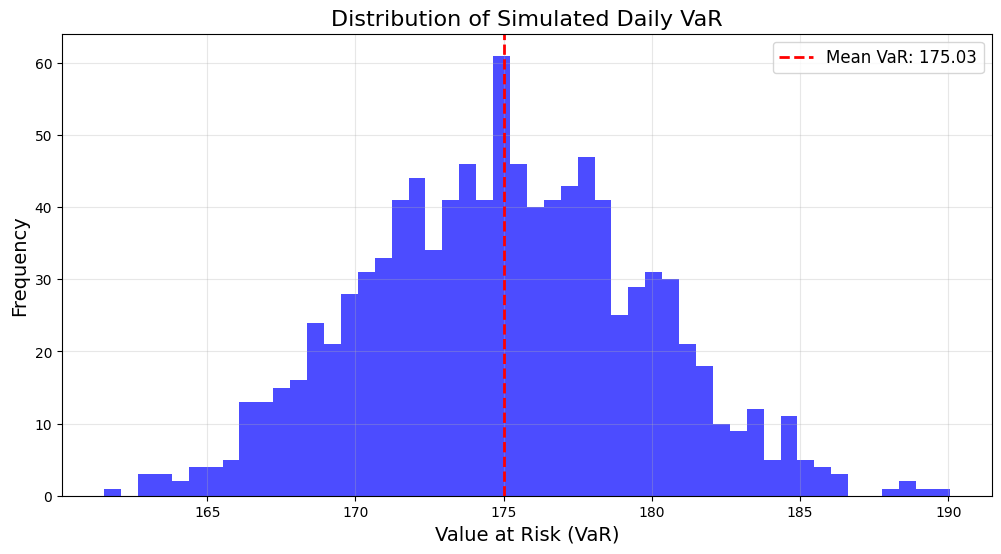

Average Simulated Daily VaR: 175.03


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define initial investment
initial_investment = 10000

# Define portfolio weights (you can adjust them to your needs)
weights = np.array([1/len(asset_df.columns)] * len(asset_df.columns))  # Equal-weighted portfolio

# Calculate the mean and standard deviation of the log returns for each asset
mean_returns = log_returns.mean()
std_returns = log_returns.std()

# Calculate the correlation matrix between the assets
corr_matrix = log_returns.corr()

# Generate the covariance matrix from the correlation matrix and standard deviations
cov_matrix = np.diag(std_returns).dot(corr_matrix).dot(np.diag(std_returns))

# Perform Monte Carlo simulations to calculate VaR
var_list = []

# Run 1000 simulations
for i in range(1000):
    # Simulate asset returns based on normal distribution
    simulated_returns = np.random.multivariate_normal(mean_returns, cov_matrix, size=1000)

    # Calculate the portfolio returns from the simulated returns
    portfolio_returns = simulated_returns.dot(weights)

    # Calculate the portfolio mean and standard deviation
    portfolio_mean = portfolio_returns.mean()
    portfolio_sd = portfolio_returns.std()

    # Investment mean and standard deviation
    investment_mean = (1 + portfolio_mean) * initial_investment
    investment_sd = initial_investment * portfolio_sd

    # Set confidence level (1% for VaR at 99% confidence)
    conf_level = 0.01

    # Calculate the VaR using the inverse of the normal distribution (ppf)
    cutoff = norm.ppf(conf_level, investment_mean, investment_sd)

    # Calculate 1-day VaR
    VaR_1day = initial_investment - cutoff
    var_list.append(VaR_1day)

# Convert the list of VaRs into a numpy array
var_array = np.array(var_list)

# Plot the distribution of simulated daily VaR
plt.figure(figsize=(12, 6))
plt.hist(var_array, bins=50, color='blue', alpha=0.7)
plt.axvline(np.mean(var_array), color='red', linestyle='dashed', linewidth=2, label=f'Mean VaR: {np.mean(var_array):,.2f}')
plt.title('Distribution of Simulated Daily VaR', fontsize=16)
plt.xlabel('Value at Risk (VaR)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Calculate the average VaR from the simulation
average_VaR = np.mean(var_array)
print(f"Average Simulated Daily VaR: {average_VaR:.2f}")


/usr/local/lib/python3.11/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


Explained Variance Ratio (for each principal component):
[0.3763897  0.26206332 0.13852606 0.09308503 0.0585307  0.02474398
 0.01923638 0.00888089 0.00851669 0.00670845 0.00331879]
Principal Components Loadings (Asset Contributions to Each Component):
                PC1       PC2       PC3       PC4       PC5       PC6  \
EUR/USD   -0.001761  0.000687  0.024221  0.005931  0.039233 -0.000057   
S&P 500    0.174933  0.043733  0.326237 -0.267567 -0.287834 -0.117092   
Nifty 50   0.090838  0.015597  0.205352 -0.160164  0.307684  0.868585   
Hang Seng  0.102359  0.033844  0.269349 -0.158294  0.787684 -0.258788   
Gold      -0.034109  0.161990  0.182077  0.317966 -0.035933 -0.026870   

                PC7       PC8       PC9      PC10      PC11  
EUR/USD    0.106246  0.908145 -0.117744 -0.380830 -0.054074  
S&P 500   -0.165467  0.232322 -0.324539  0.638867 -0.313168  
Nifty 50  -0.263848  0.030643  0.047574  0.030568 -0.028671  
Hang Seng  0.416395 -0.027356 -0.051659  0.162901 -0.003915  

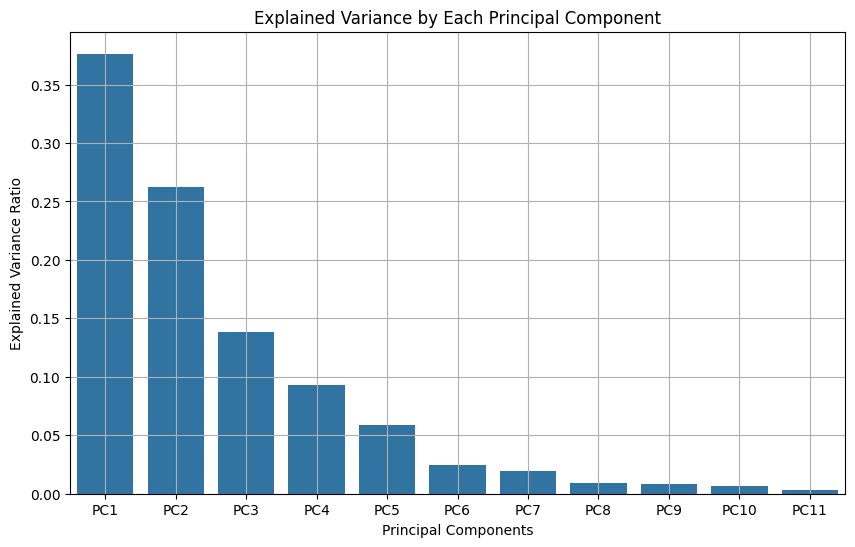

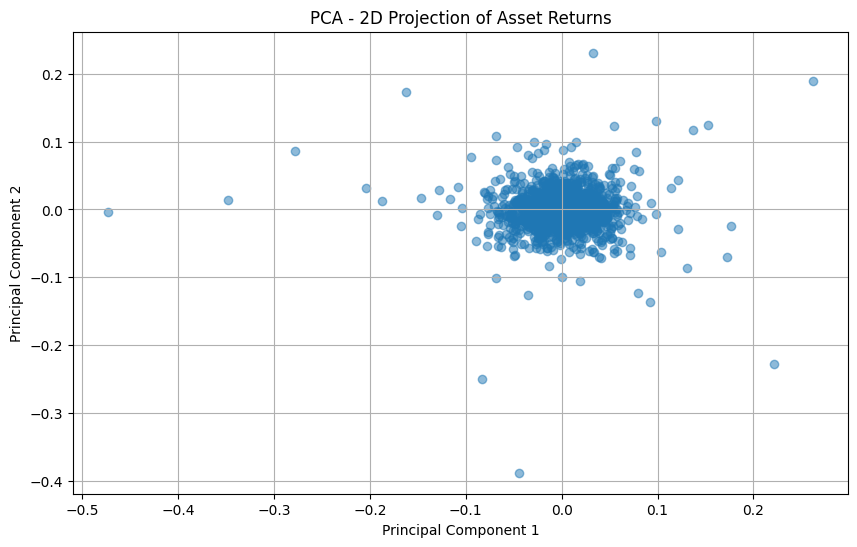

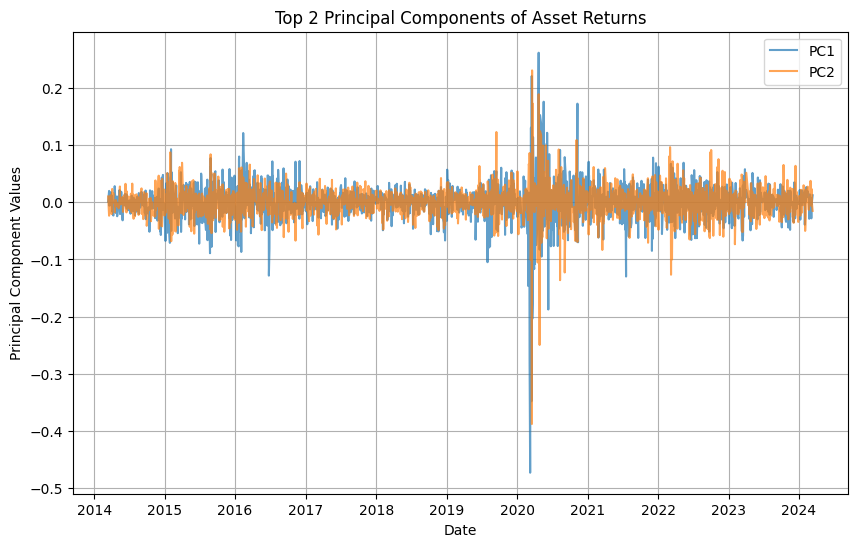

In [19]:
from sklearn.decomposition import PCA
import seaborn as sns

# First, make sure to calculate the log returns (if not already done)
log_returns = np.log(asset_df / asset_df.shift(1))

# Drop the first row (NaN values due to the shift operation)
log_returns = log_returns.dropna()

# Perform PCA on the log returns of the asset classes
pca = PCA()
pca.fit(log_returns)

# Explained variance ratio (how much variance each component explains)
explained_variance_ratio = pca.explained_variance_ratio_

# Principal components (the loadings for each asset class in the principal components)
principal_components = pca.components_

# Create a DataFrame to visualize the loadings of each principal component for each asset class
pca_df = pd.DataFrame(principal_components.T, columns=[f'PC{i+1}' for i in range(len(principal_components))], index=log_returns.columns)

# Display the explained variance ratio (how much variance each principal component explains)
print("Explained Variance Ratio (for each principal component):")
print(explained_variance_ratio)

# Display the first few rows of the principal components
print("Principal Components Loadings (Asset Contributions to Each Component):")
print(pca_df.head())

# Visualize the explained variance
plt.figure(figsize=(10, 6))
sns.barplot(x=[f'PC{i+1}' for i in range(len(explained_variance_ratio))], y=explained_variance_ratio)
plt.title("Explained Variance by Each Principal Component")
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()

# Visualize the first two principal components (2D projection of asset returns)
log_returns_pca = pca.transform(log_returns)

plt.figure(figsize=(10, 6))
plt.scatter(log_returns_pca[:, 0], log_returns_pca[:, 1], alpha=0.5)
plt.title("PCA - 2D Projection of Asset Returns")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

# Optional: If you want to project the data onto a specific number of components (e.g., top 2 components), use the following code
log_returns_pca_2d = pca.transform(log_returns)[:, :2]  # Top 2 components

# Create a DataFrame for the top 2 components
pca_2d_df = pd.DataFrame(log_returns_pca_2d, columns=["PC1", "PC2"], index=log_returns.index)

# Plot the 2D projection with respect to time
plt.figure(figsize=(10, 6))
plt.plot(pca_2d_df.index, pca_2d_df["PC1"], label="PC1", alpha=0.7)
plt.plot(pca_2d_df.index, pca_2d_df["PC2"], label="PC2", alpha=0.7)
plt.title("Top 2 Principal Components of Asset Returns")
plt.xlabel("Date")
plt.ylabel("Principal Component Values")
plt.legend()
plt.grid(True)
plt.show()


#**STRESS TESTING**

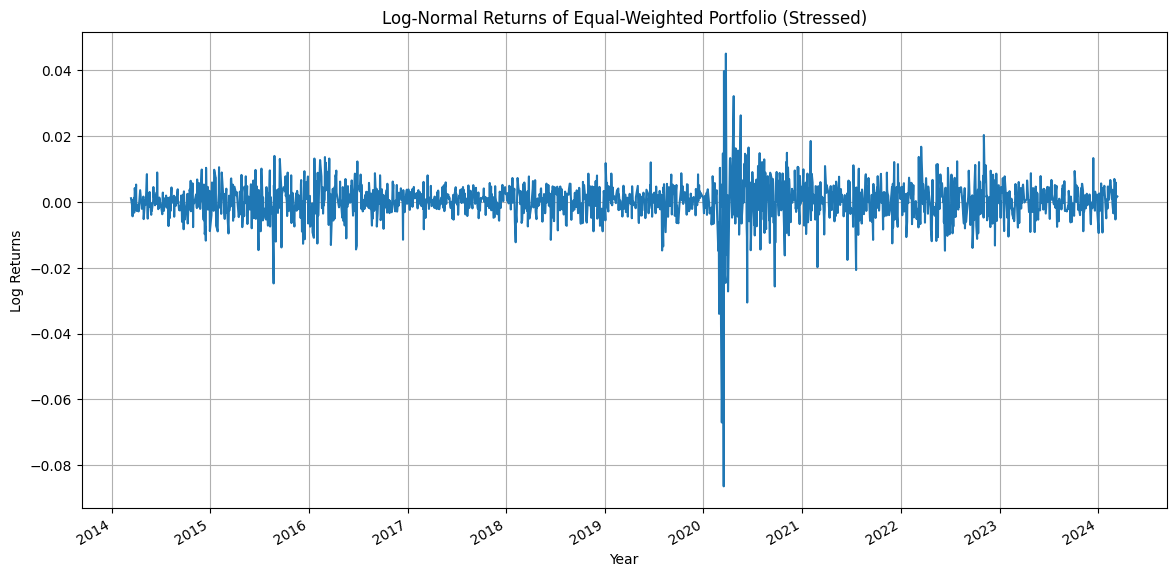

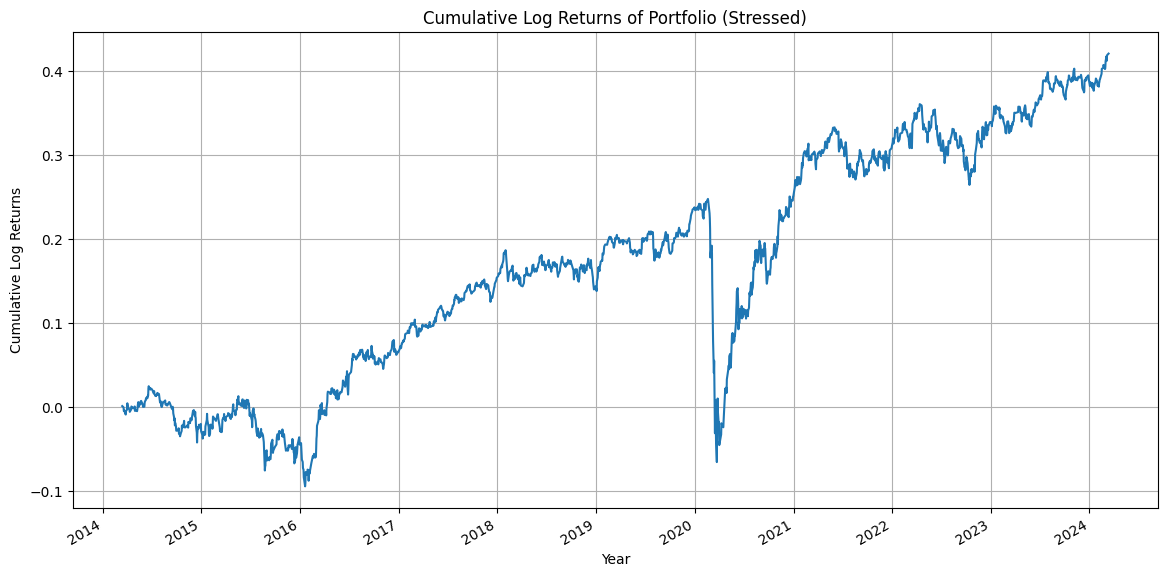

In [22]:
# Example of applying historical shocks (e.g., 2008 financial crisis)
historical_shock_data = {
    "EUR/USD": 0.90,  # Example: EUR/USD depreciated by 10% during the 2008 crisis
    "S&P 500": 0.75,  # S&P 500 dropped 25%
    "Nifty 50": 0.70,  # Nifty 50 dropped 30%
    "Hang Seng": 0.70,  # Hang Seng dropped 30%
    "Gold": 1.20,  # Gold rose 20%
    "Silver": 1.15,  # Silver rose 15%
    "US 10Y Treasury": 1.05,  # Bonds appreciated 5%
    "Crude Oil": 0.40,  # Crude oil dropped 60%
    "Real Estate": 0.85,  # Real estate dropped 15%
    "Emerging Markets": 0.65,  # Emerging Markets dropped 35%
    "High Yield Bonds": 0.50  # High Yield Bonds dropped 50%
}

# Apply historical shocks to the log returns of each asset
shocked_log_returns = log_returns.copy()

for asset, shock_factor in historical_shock_data.items():
    shocked_log_returns[asset] *= shock_factor

# Calculate the portfolio returns under stressed conditions (weighted average of individual asset returns)
portfolio_returns_stressed = shocked_log_returns.dot(weights)

# Plot the portfolio log returns after stress testing
plt.figure(figsize=(14, 7))
portfolio_returns_stressed.plot(figsize=(14, 7), title="Log-Normal Returns of Equal-Weighted Portfolio (Stressed)")
plt.xlabel("Year")
plt.ylabel("Log Returns")
plt.grid()
plt.show()

# Optionally, display the portfolio's cumulative log return over time after stress testing
cumulative_portfolio_returns_stressed = portfolio_returns_stressed.cumsum()
plt.figure(figsize=(14, 7))
cumulative_portfolio_returns_stressed.plot(figsize=(14, 7), title="Cumulative Log Returns of Portfolio (Stressed)")
plt.xlabel("Year")
plt.ylabel("Cumulative Log Returns")
plt.grid()
plt.show()



VaR at 5.0% confidence level:
  1-Day VaR: 10,000.01
  10-Day VaR: 31,622.81
  Monthly VaR: 45,825.80
  Yearly VaR: 158,745.23


VaR at 2.5% confidence level:
  1-Day VaR: 10,000.01
  10-Day VaR: 31,622.81
  Monthly VaR: 45,825.81
  Yearly VaR: 158,745.26


VaR at 1.0% confidence level:
  1-Day VaR: 10,000.01
  10-Day VaR: 31,622.82
  Monthly VaR: 45,825.82
  Yearly VaR: 158,745.30


VaR at 0.5% confidence level:
  1-Day VaR: 10,000.02
  10-Day VaR: 31,622.82
  Monthly VaR: 45,825.83
  Yearly VaR: 158,745.32




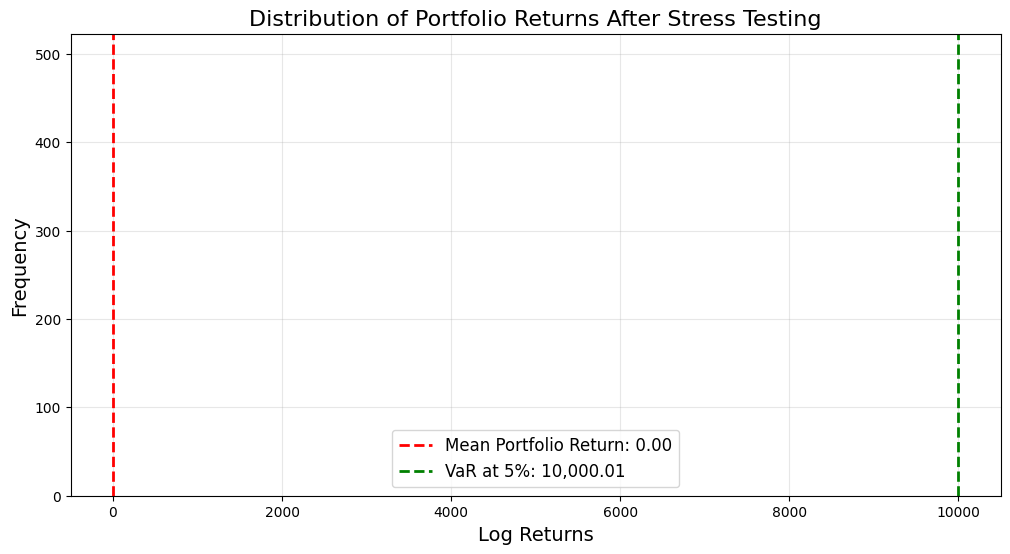

In [23]:

# Calculate VaR for the stressed portfolio at different confidence intervals
confidence_levels = [0.05, 0.025, 0.01, 0.005]
VaR_1_day = {}

# Assuming an initial portfolio value of 10000
initial_investment = 10000

# Simulate VaR for different time horizons and confidence levels
for conf_level in confidence_levels:
    # Calculate the VaR for 1-day
    portfolio_sd_stressed = portfolio_returns_stressed.std()
    portfolio_mean_stressed = portfolio_returns_stressed.mean()

    # Assuming the returns follow a normal distribution
    VaR_1_day[conf_level] = initial_investment - norm.ppf(conf_level, portfolio_mean_stressed, portfolio_sd_stressed)

    # Extend VaR to different time horizons
    VaR_10_day = VaR_1_day[conf_level] * np.sqrt(10)
    VaR_monthly = VaR_1_day[conf_level] * np.sqrt(21)  # Approx 21 trading days in a month
    VaR_yearly = VaR_1_day[conf_level] * np.sqrt(252)  # Approx 252 trading days in a year

    # Display results for each confidence level
    print(f"VaR at {conf_level*100}% confidence level:")
    print(f"  1-Day VaR: {VaR_1_day[conf_level]:,.2f}")
    print(f"  10-Day VaR: {VaR_10_day:,.2f}")
    print(f"  Monthly VaR: {VaR_monthly:,.2f}")
    print(f"  Yearly VaR: {VaR_yearly:,.2f}")
    print("\n")

# Plot the distribution of simulated portfolio returns under stress testing
plt.figure(figsize=(12, 6))
plt.hist(portfolio_returns_stressed, bins=50, color='blue', alpha=0.7)
plt.axvline(np.mean(portfolio_returns_stressed), color='red', linestyle='dashed', linewidth=2, label=f'Mean Portfolio Return: {np.mean(portfolio_returns_stressed):,.2f}')
plt.axvline(VaR_1_day[0.05], color='green', linestyle='dashed', linewidth=2, label=f'VaR at 5%: {VaR_1_day[0.05]:,.2f}')
plt.title('Distribution of Portfolio Returns After Stress Testing', fontsize=16)
plt.xlabel('Log Returns', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

**STRESS TESTING RANDOM BEHAVIOR**

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<ipython-input-25-624294c43f4a>:36: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify '

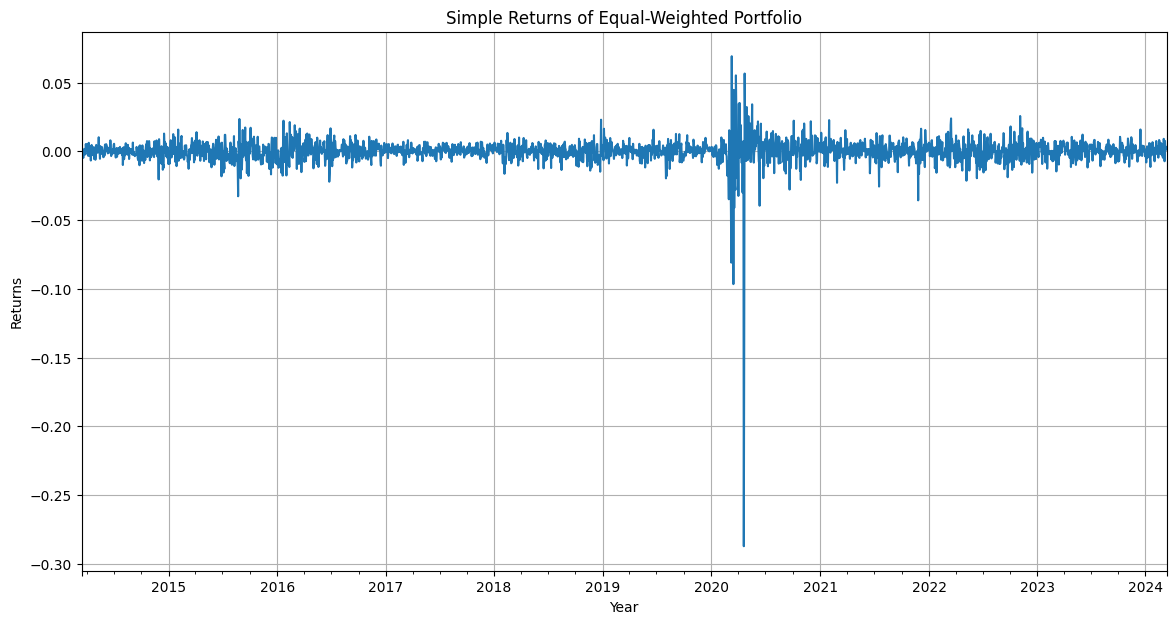

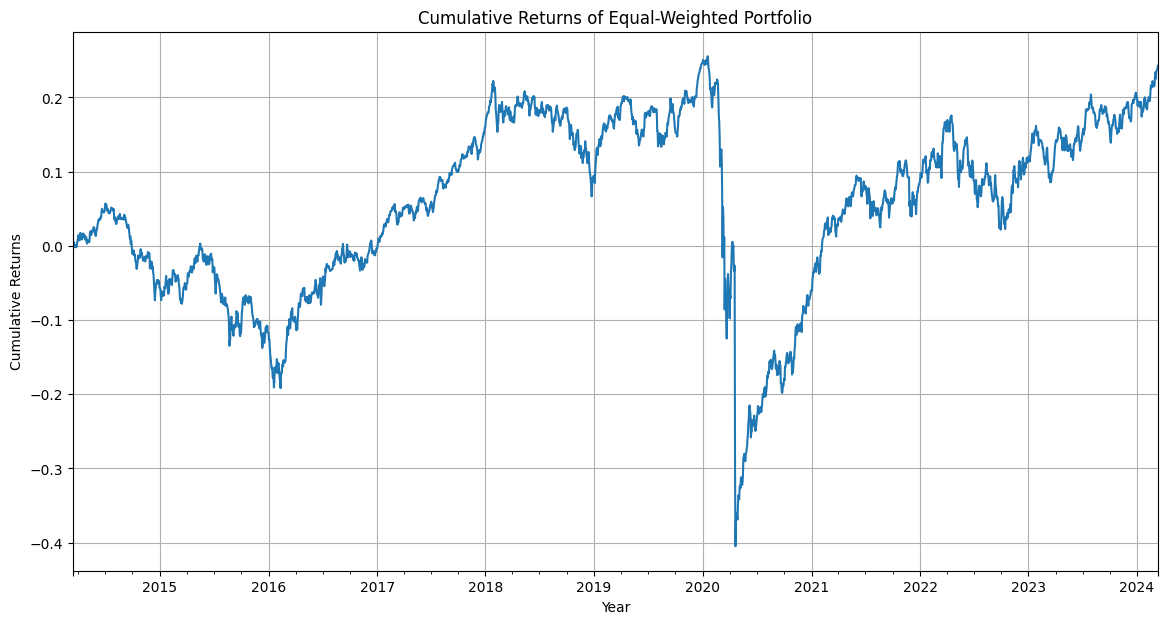

Date
2014-03-14    0.001141
2014-03-17    0.002477
2014-03-18    0.001395
2014-03-19   -0.002247
2014-03-20   -0.004734
Freq: B, dtype: float64


In [25]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define asset class tickers
assets = {
    "EUR/USD": "EURUSD=X",
    "S&P 500": "^GSPC",
    "Nifty 50": "^NSEI",
    "Hang Seng": "^HSI",
    "Gold": "GC=F",
    "Silver": "SI=F",
    "US 10Y Treasury": "^TNX",
    "Crude Oil": "CL=F",
    "Real Estate": "VNQ",
    "Emerging Markets": "EEM",
    "High Yield Bonds": "HYG"
}

# Define time period
start_date = "2014-03-13"
end_date = "2024-03-13"

# Fetch historical data
asset_data = []
for asset, ticker in assets.items():
    data = yf.download(ticker, start=start_date, end=end_date)[["Close"]]
    data.columns = [asset]  # Rename column to asset name
    asset_data.append(data)

# Combine all asset data into a single DataFrame
if asset_data:
    asset_df = pd.concat(asset_data, axis=1)

    # Calculate simple returns (percentage change)
    simple_returns = asset_df.pct_change().dropna()

    # Equal weighting of the assets (1/n where n is the number of assets)
    weights = np.ones(len(assets)) / len(assets)

    # Calculate portfolio returns (weighted average of individual asset returns)
    portfolio_returns = simple_returns.dot(weights)

    # Plot the portfolio returns
    plt.figure(figsize=(14, 7))
    portfolio_returns.plot(figsize=(14, 7), title="Simple Returns of Equal-Weighted Portfolio")
    plt.xlabel("Year")
    plt.ylabel("Returns")
    plt.grid()
    plt.show()

    # Optionally, display the portfolio's cumulative return over time
    cumulative_portfolio_returns = (1 + portfolio_returns).cumprod() - 1
    plt.figure(figsize=(14, 7))
    cumulative_portfolio_returns.plot(figsize=(14, 7), title="Cumulative Returns of Equal-Weighted Portfolio")
    plt.xlabel("Year")
    plt.ylabel("Cumulative Returns")
    plt.grid()
    plt.show()

    # Print first few rows of portfolio returns to verify
    print(portfolio_returns.head())

else:
    print("No valid data retrieved. Check the asset tickers or date range.")


KEY ECONOMIC DRIVERS STRESS TESTING

INTEREST RATE

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Portfolio 1-Day VaR at 1% Quantile due to Interest Rate Shocks:  2753.8508561521608


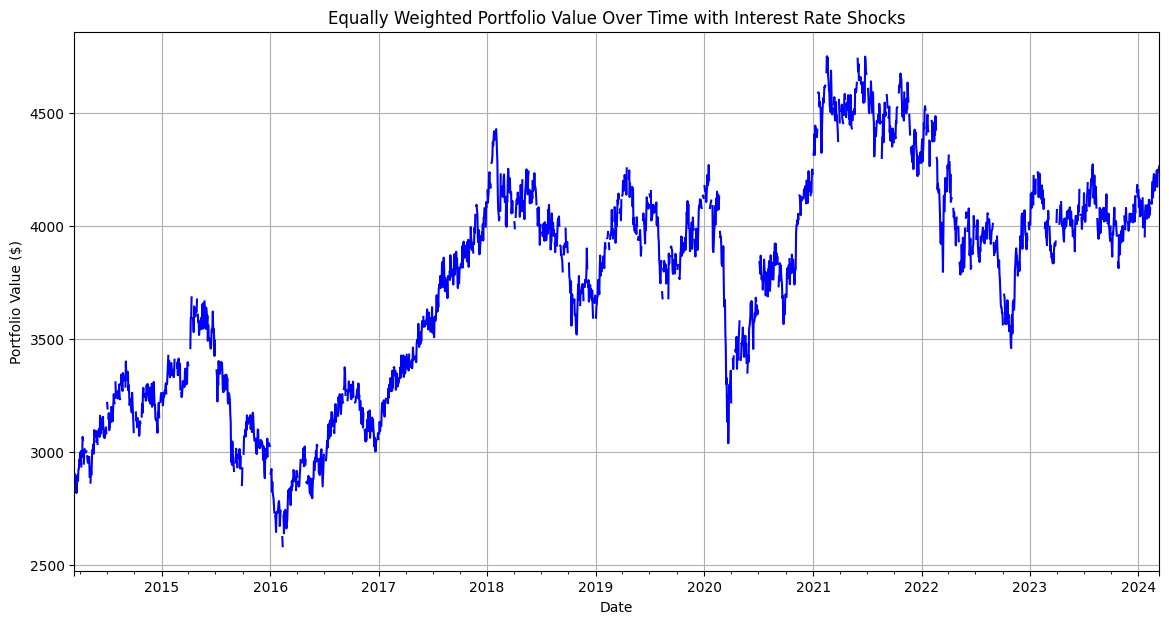

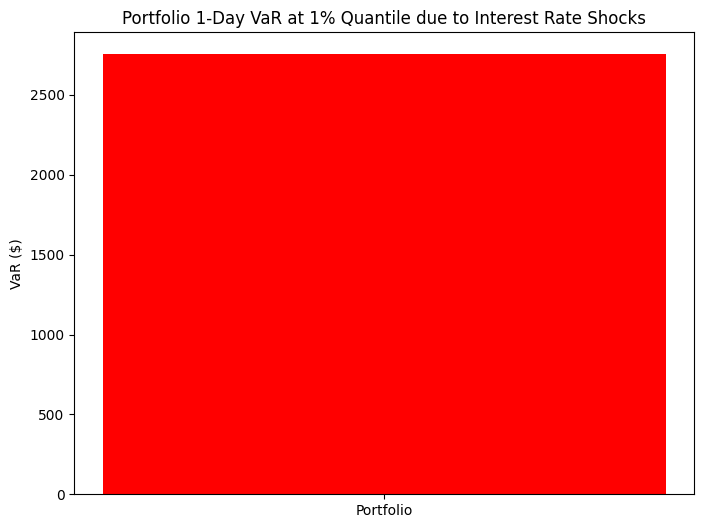

In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define asset class tickers
assets = {
    "EUR/USD": "EURUSD=X",
    "S&P 500": "^GSPC",
    "Nifty 50": "^NSEI",
    "Hang Seng": "^HSI",
    "Gold": "GC=F",
    "Silver": "SI=F",
    "US 10Y Treasury": "^TNX",
    "Crude Oil": "CL=F",
    "Real Estate": "VNQ",
    "Emerging Markets": "EEM",
    "High Yield Bonds": "HYG"
}

# Define time period
start_date = "2014-03-13"
end_date = "2024-03-13"

# Fetch historical data
asset_data = []
for asset, ticker in assets.items():
    data = yf.download(ticker, start=start_date, end=end_date)[["Close"]]
    data.columns = [asset]  # Rename column to asset name
    asset_data.append(data)

# Combine all asset data into a single DataFrame
if asset_data:
    asset_df = pd.concat(asset_data, axis=1)

    # Simulate shocks based on interest rate changes (between 25 and 100 basis points)
    shock_factors = {
        "EUR/USD": 0.01,  # 1% change
        "S&P 500": 0.02,  # 2% change
        "Nifty 50": 0.02,
        "Hang Seng": 0.02,
        "Gold": -0.015,  # Gold tends to rise when interest rates drop
        "Silver": -0.015,
        "US 10Y Treasury": 0.02,
        "Crude Oil": 0.015,
        "Real Estate": 0.01,
        "Emerging Markets": 0.02,
        "High Yield Bonds": 0.03
    }

    # Create a DataFrame for portfolio values
    num_assets = len(assets)
    equal_weights = np.ones(num_assets) / num_assets  # Equal weight for each asset

    # Apply shocks to each asset's closing price using random values between +/- shock factor
    shocked_df = pd.DataFrame()
    for asset in assets:
        shocked_df[asset] = asset_df[asset] * (1 + np.random.uniform(-shock_factors[asset], shock_factors[asset], size=len(asset_df)))

    # Calculate the portfolio value with equal-weighted allocations
    portfolio_value = shocked_df.dot(equal_weights)

    # Calculate VaR at the 1% quantile for the portfolio
    portfolio_var = portfolio_value.quantile(0.01)

    # Print VaR
    print("Portfolio 1-Day VaR at 1% Quantile due to Interest Rate Shocks: ", portfolio_var)

    # Plot the portfolio value over time
    plt.figure(figsize=(14, 7))
    portfolio_value.plot(title="Equally Weighted Portfolio Value Over Time with Interest Rate Shocks", color='blue')
    plt.xlabel("Date")
    plt.ylabel("Portfolio Value ($)")
    plt.grid(True)
    plt.show()

    # Plot the VaR value
    plt.figure(figsize=(8, 6))
    plt.bar(["Portfolio"], [portfolio_var], color='red')
    plt.title("Portfolio 1-Day VaR at 1% Quantile due to Interest Rate Shocks")
    plt.ylabel("VaR ($)")
    plt.show()

else:
    print("No valid data retrieved. Check the asset tickers or date range.")


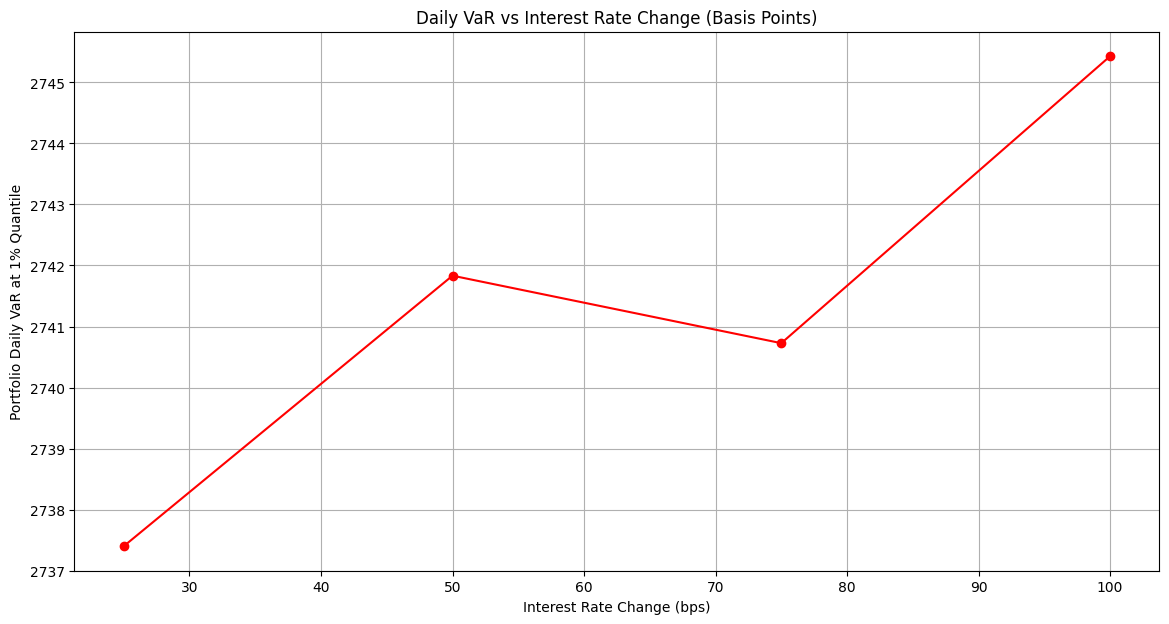

In [8]:
# Combine all asset data into a single DataFrame
if asset_data:
    asset_df = pd.concat(asset_data, axis=1)

    # Simulate shocks based on interest rate changes (between 25 and 100 basis points)
    shock_factors = {
        "EUR/USD": 0.01,  # 1% change
        "S&P 500": 0.02,  # 2% change
        "Nifty 50": 0.02,
        "Hang Seng": 0.02,
        "Gold": -0.015,  # Gold tends to rise when interest rates drop
        "Silver": -0.015,
        "US 10Y Treasury": 0.02,
        "Crude Oil": 0.015,
        "Real Estate": 0.01,
        "Emerging Markets": 0.02,
        "High Yield Bonds": 0.03
    }

    # Create a DataFrame for portfolio values
    num_assets = len(assets)
    equal_weights = np.ones(num_assets) / num_assets  # Equal weight for each asset

    # Prepare DataFrame to store daily VaR results for different shocks
    var_results = []

    # Range of interest rate changes (between 25 and 100 basis points)
    rate_changes = np.arange(25, 101, 25)

    for rate_change in rate_changes:
        # Apply shocks to each asset's closing price based on the interest rate change
        shocked_df = pd.DataFrame()
        for asset in assets:
            shock_factor = shock_factors[asset] * (rate_change / 100)  # Adjust shock factor based on rate change
            shocked_df[asset] = asset_df[asset] * (1 + np.random.uniform(-shock_factor, shock_factor, size=len(asset_df)))

        # Calculate the portfolio value with equal-weighted allocations
        portfolio_value = shocked_df.dot(equal_weights)

        # Calculate VaR at the 1% quantile for the portfolio
        portfolio_var = portfolio_value.quantile(0.01)
        var_results.append(portfolio_var)

    # Plot how daily VaR changes with interest rate changes
    plt.figure(figsize=(14, 7))
    plt.plot(rate_changes, var_results, marker='o', color='red')
    plt.title("Daily VaR vs Interest Rate Change (Basis Points)")
    plt.xlabel("Interest Rate Change (bps)")
    plt.ylabel("Portfolio Daily VaR at 1% Quantile")
    plt.grid(True)
    plt.show()

else:
    print("No valid data retrieved. Check the asset tickers or date range.")


MONTE CARLO SIMULATION

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<ipython-input-20-1cec5191b970>:37: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify '

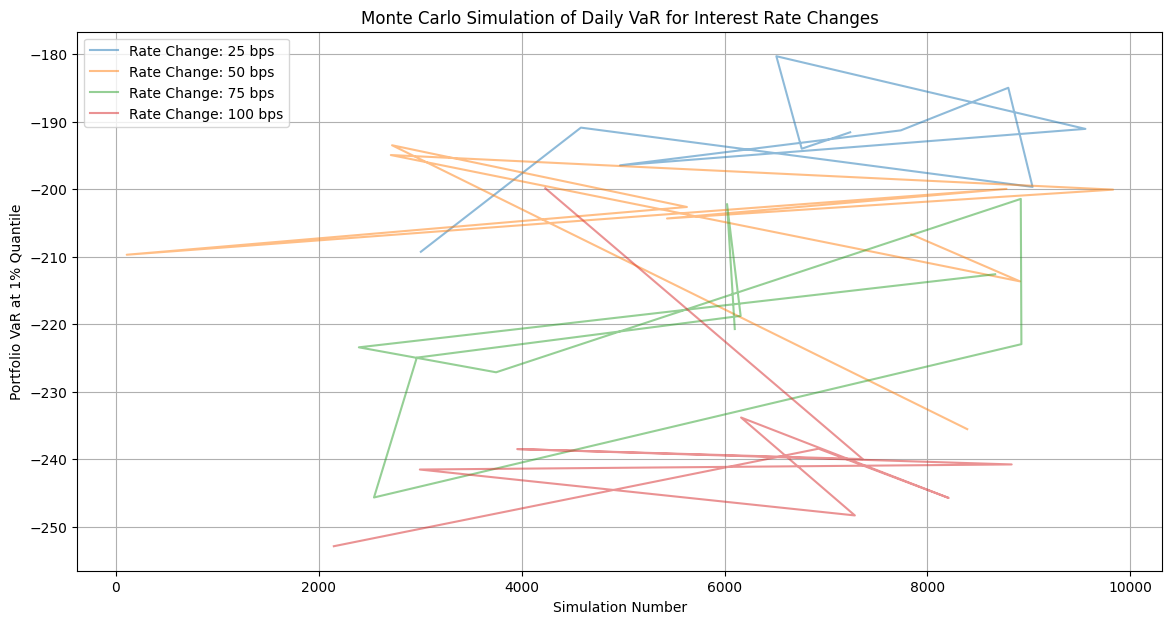

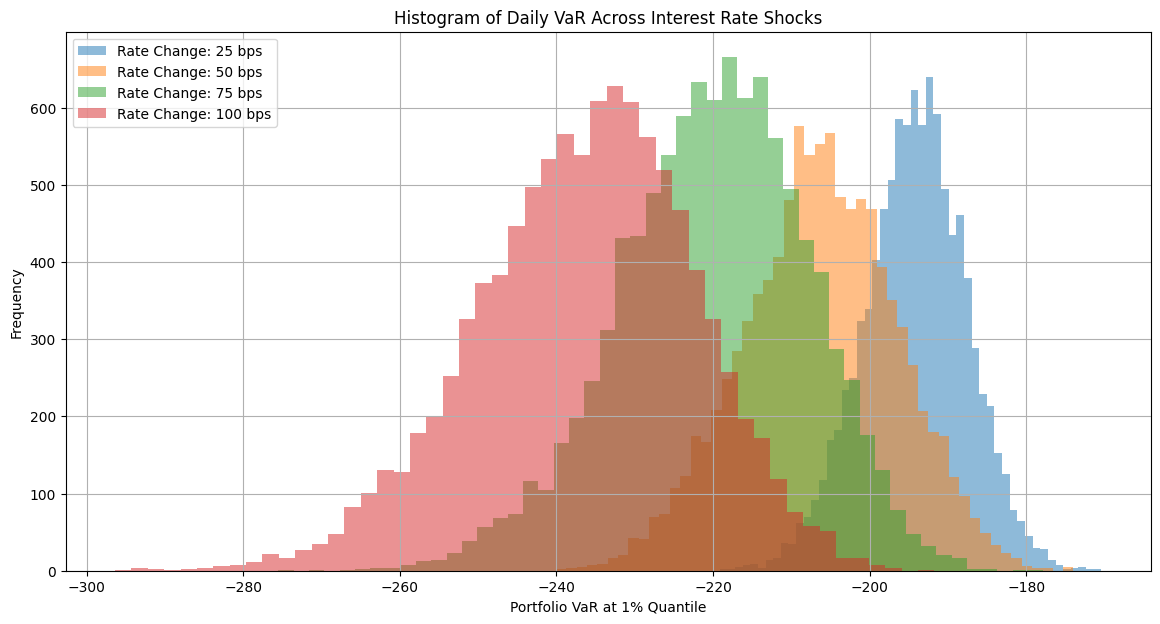

<ipython-input-20-1cec5191b970>:93: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(var_results[rate], label=f"Rate Change: {rate} bps", shade=True)
<ipython-input-20-1cec5191b970>:93: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(var_results[rate], label=f"Rate Change: {rate} bps", shade=True)
<ipython-input-20-1cec5191b970>:93: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(var_results[rate], label=f"Rate Change: {rate} bps", shade=True)
<ipython-input-20-1cec5191b970>:93: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your co

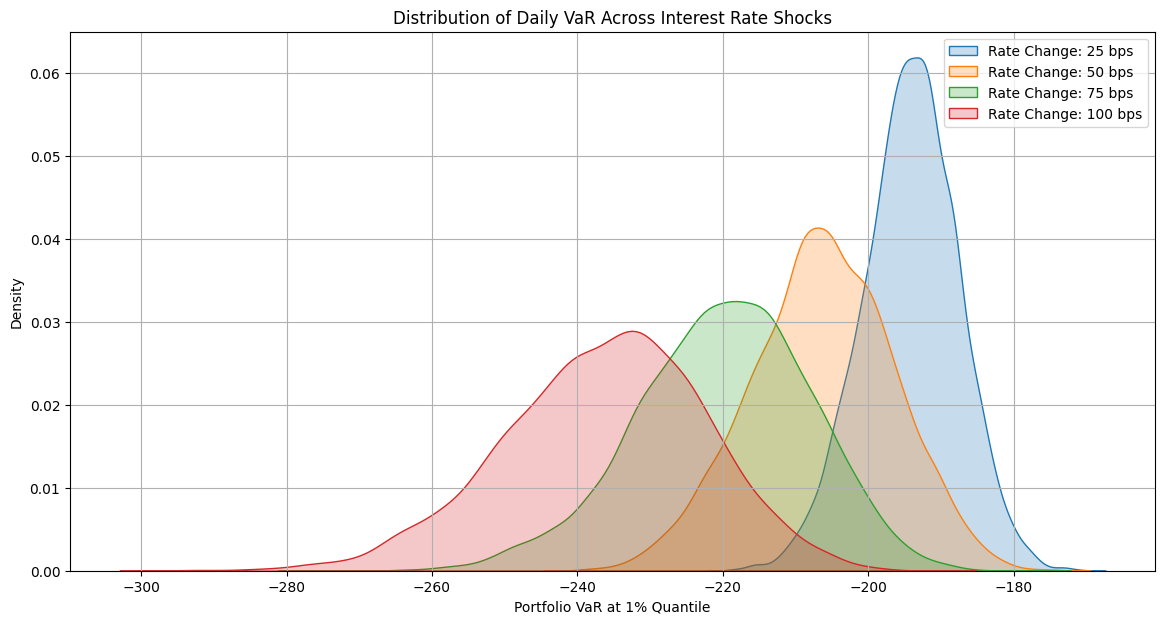


Statistics for 25 bps rate change:
Mean: -194.2165
Std: 6.5580
Min: -219.1608
25th Percentile: -198.3571
Median (50th Percentile): -194.0461
75th Percentile: -189.7807
Max: -170.4409

Statistics for 50 bps rate change:
Mean: -206.3975
Std: 9.8040
Min: -240.0571
25th Percentile: -212.9066
Median (50th Percentile): -206.2188
75th Percentile: -199.6225
Max: -174.0218

Statistics for 75 bps rate change:
Mean: -219.9813
Std: 12.0306
Min: -275.5055
25th Percentile: -227.7912
Median (50th Percentile): -219.4345
75th Percentile: -211.6074
Max: -177.8472

Statistics for 100 bps rate change:
Mean: -236.3281
Std: 13.9398
Min: -296.3674
25th Percentile: -245.4075
Median (50th Percentile): -235.4381
75th Percentile: -226.5881
Max: -191.7604


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns  # Import seaborn for kdeplot

# Define asset class tickers
assets = {
    "EUR/USD": "EURUSD=X",
    "S&P 500": "^GSPC",
    "Nifty 50": "^NSEI",
    "Hang Seng": "^HSI",
    "Gold": "GC=F",
    "Silver": "SI=F",
    "US 10Y Treasury": "^TNX",
    "Crude Oil": "CL=F",
    "Real Estate": "VNQ",
    "Emerging Markets": "EEM",
    "High Yield Bonds": "HYG"
}

# Define time period
start_date = "2014-03-13"
end_date = "2024-03-13"

# Fetch historical data
asset_data = []
for asset, ticker in assets.items():
    data = yf.download(ticker, start=start_date, end=end_date)[["Close"]]
    data.columns = [asset]  # Rename column to asset name
    asset_data.append(data)

# Combine all asset data into a single DataFrame
asset_df = pd.concat(asset_data, axis=1)

# Create an equal-weighted portfolio (sum of percentage returns for each asset)
weights = np.ones(len(assets)) / len(assets)
portfolio_values = (asset_df.pct_change().dropna() * weights).sum(axis=1)

# Set initial portfolio value to 10,000
initial_portfolio_value = 10000
portfolio_values *= initial_portfolio_value

# Perform Monte Carlo simulation for daily VaR with interest rate changes between 25 and 100 bps
np.random.seed(42)
simulations = 10000  # Number of simulations
rate_changes = np.arange(25, 101, 25)  # Interest rate changes between 25 and 100 bps

# Store results for VaR at 1% quantile for each rate change
var_results = {rate: [] for rate in rate_changes}

# Monte Carlo Simulation for each rate change
for rate in rate_changes:
    for _ in range(simulations):
        # Apply random shock based on rate change
        random_shock = np.random.uniform(1 - rate/100, 1 + rate/100, len(portfolio_values))

        # Simulate portfolio returns with the shock applied
        simulated_returns = portfolio_values * random_shock

        # Calculate VaR at 1% quantile
        var_results[rate].append(np.percentile(simulated_returns, 1))

# Plot the Monte Carlo results for VaR across different rate changes
plt.figure(figsize=(14, 7))

# Plot individual simulation paths
for rate in rate_changes:
    plt.plot(np.random.choice(range(simulations), size=10), var_results[rate][:10], label=f"Rate Change: {rate} bps", alpha=0.5)

plt.title("Monte Carlo Simulation of Daily VaR for Interest Rate Changes")
plt.xlabel("Simulation Number")
plt.ylabel("Portfolio VaR at 1% Quantile")
plt.legend()
plt.grid(True)
plt.show()

# Additional code for histogram, distribution, and basic statistics
# Plot histograms of VaR for each interest rate change
plt.figure(figsize=(14, 7))
for rate in rate_changes:
    plt.hist(var_results[rate], bins=50, alpha=0.5, label=f"Rate Change: {rate} bps")

plt.title("Histogram of Daily VaR Across Interest Rate Shocks")
plt.xlabel("Portfolio VaR at 1% Quantile")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

# Plot the distribution of VaR for each interest rate change using kdeplot from seaborn
plt.figure(figsize=(14, 7))
for rate in rate_changes:
    sns.kdeplot(var_results[rate], label=f"Rate Change: {rate} bps", shade=True)

plt.title("Distribution of Daily VaR Across Interest Rate Shocks")
plt.xlabel("Portfolio VaR at 1% Quantile")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

# Calculate and display basic statistics (mean, std, min, 25th, 50th, 75th, max) for VaR at 1% quantile
var_stats = {}
for rate in rate_changes:
    var_stats[rate] = {
        'Mean': np.mean(var_results[rate]),
        'Std': np.std(var_results[rate]),
        'Min': np.min(var_results[rate]),
        '25th Percentile': np.percentile(var_results[rate], 25),
        'Median (50th Percentile)': np.percentile(var_results[rate], 50),
        '75th Percentile': np.percentile(var_results[rate], 75),
        'Max': np.max(var_results[rate])
    }

# Display basic statistics
for rate in rate_changes:
    print(f"\nStatistics for {rate} bps rate change:")
    for stat, value in var_stats[rate].items():
        print(f"{stat}: {value:.4f}")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<ipython-input-27-6268145167dd>:37: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify '

Correlation of each asset with US 10Y Treasury over the last 5 years:
EUR/USD            -0.053470
S&P 500             0.281286
Nifty 50            0.137985
Hang Seng           0.139706
Gold               -0.267225
Silver             -0.123246
Crude Oil           0.095545
Real Estate         0.181860
Emerging Markets    0.246386
High Yield Bonds    0.089634
Name: US 10Y Treasury, dtype: float64


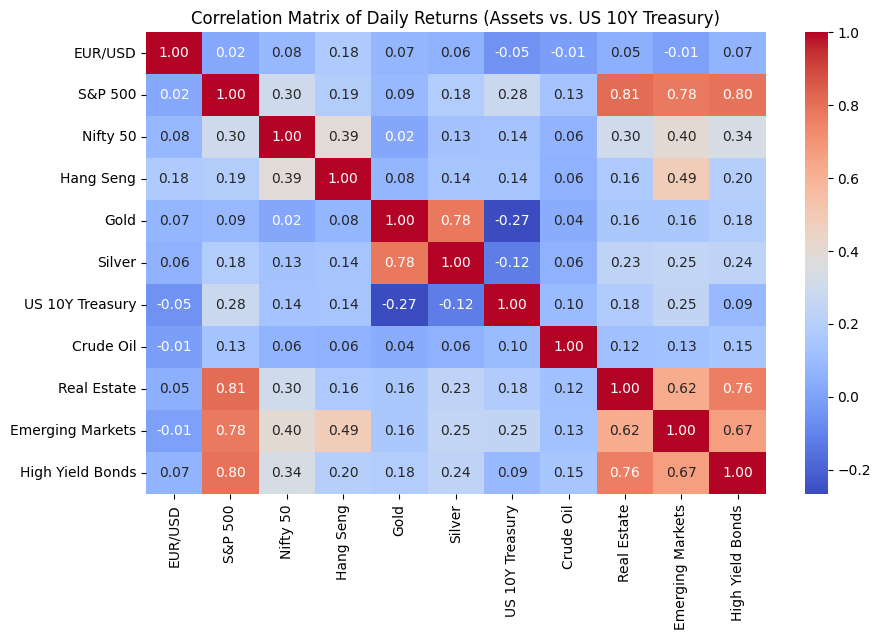

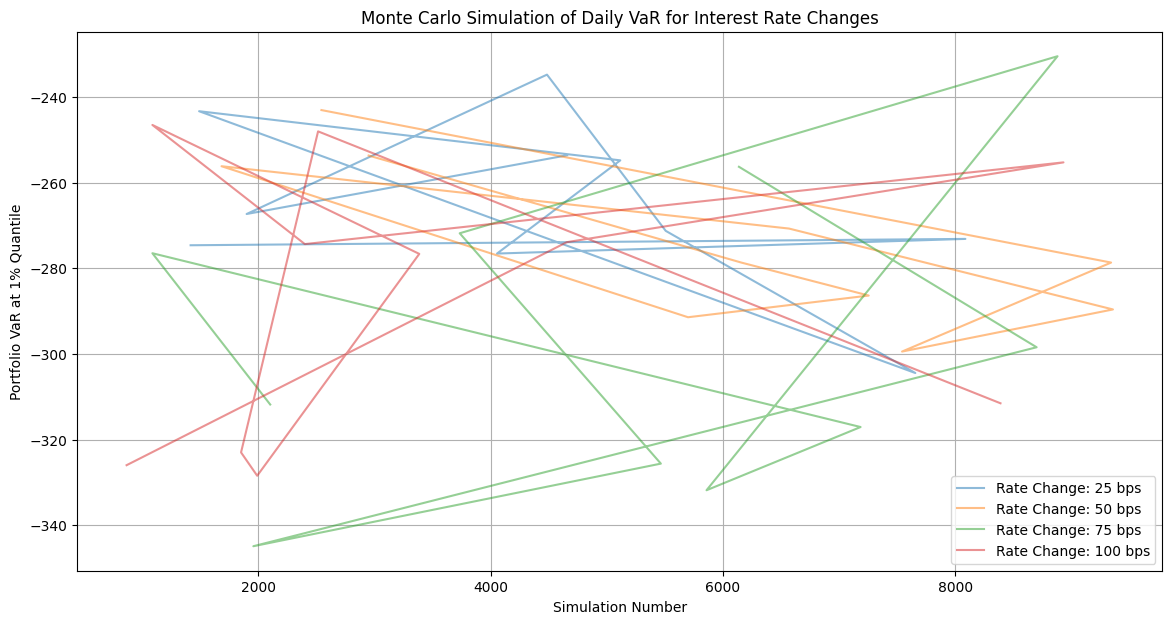

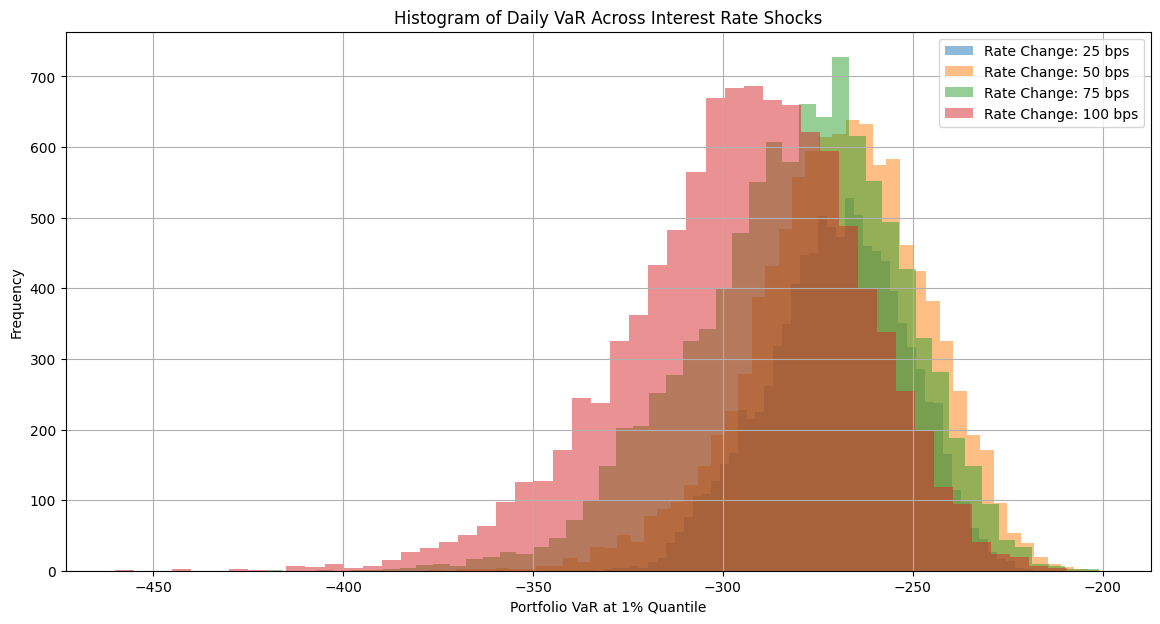

<ipython-input-27-6268145167dd>:110: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(var_results[rate], label=f"Rate Change: {rate} bps", shade=True)
<ipython-input-27-6268145167dd>:110: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(var_results[rate], label=f"Rate Change: {rate} bps", shade=True)
<ipython-input-27-6268145167dd>:110: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(var_results[rate], label=f"Rate Change: {rate} bps", shade=True)
<ipython-input-27-6268145167dd>:110: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update you

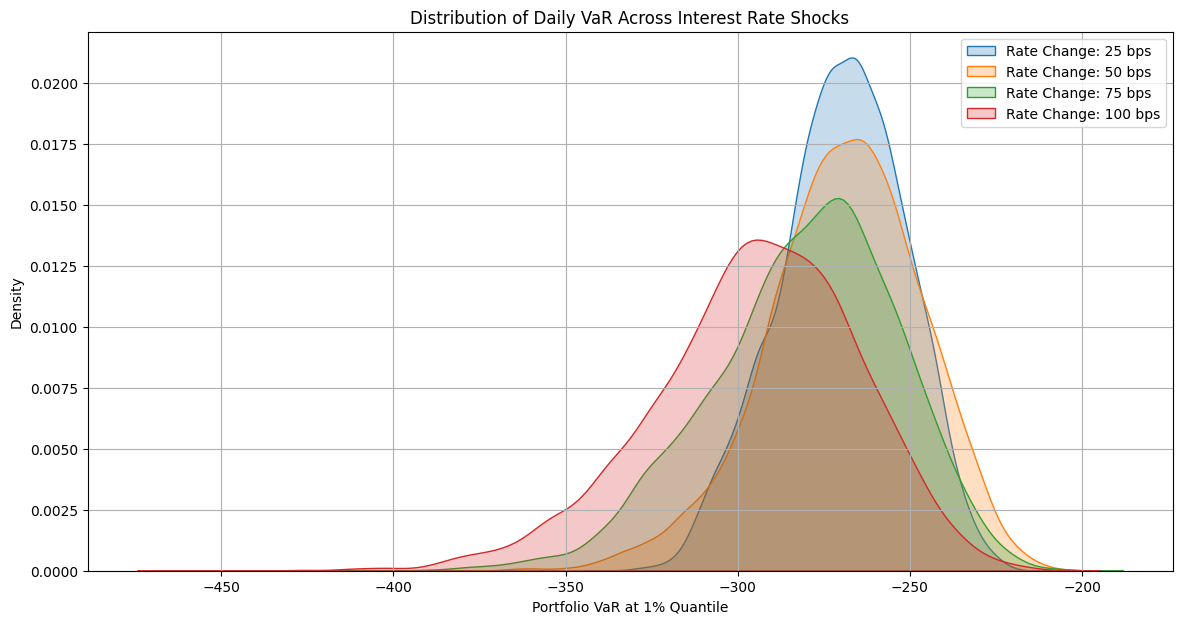


Statistics for 25 bps rate change:
Mean: -269.8567
Std: 18.2315
Min: -336.1380
25th Percentile: -281.8333
Median (50th Percentile): -269.0478
75th Percentile: -256.7591
Max: -218.4391

Statistics for 50 bps rate change:
Mean: -269.5147
Std: 22.7715
Min: -377.4526
25th Percentile: -283.6512
Median (50th Percentile): -268.4482
75th Percentile: -253.8565
Max: -200.3313

Statistics for 75 bps rate change:
Mean: -280.7840
Std: 27.3103
Min: -420.1686
25th Percentile: -297.7438
Median (50th Percentile): -278.1669
75th Percentile: -261.5326
Max: -201.0625

Statistics for 100 bps rate change:
Mean: -295.0465
Std: 30.2862
Min: -460.0901
25th Percentile: -313.4377
Median (50th Percentile): -293.0457
75th Percentile: -273.7769
Max: -209.2556


In [27]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Define asset class tickers
assets = {
    "EUR/USD": "EURUSD=X",
    "S&P 500": "^GSPC",
    "Nifty 50": "^NSEI",
    "Hang Seng": "^HSI",
    "Gold": "GC=F",
    "Silver": "SI=F",
    "US 10Y Treasury": "^TNX",
    "Crude Oil": "CL=F",
    "Real Estate": "VNQ",
    "Emerging Markets": "EEM",
    "High Yield Bonds": "HYG"
}

# Define time period for last 5 years
start_date = "2019-03-13"
end_date = "2024-03-13"

# Fetch historical data for all assets
asset_data = []
for asset, ticker in assets.items():
    data = yf.download(ticker, start=start_date, end=end_date)[["Close"]]
    data.columns = [asset]  # Rename column to asset name
    asset_data.append(data)

# Combine all asset data into a single DataFrame
asset_df = pd.concat(asset_data, axis=1)

# Calculate the daily percentage change for each asset and US 10Y Treasury
daily_changes = asset_df.pct_change().dropna()

# Calculate the correlation of each asset with the US 10Y Treasury
correlation_with_rates = daily_changes.corr()['US 10Y Treasury'].drop('US 10Y Treasury')

# Display the correlation results
print("Correlation of each asset with US 10Y Treasury over the last 5 years:")
print(correlation_with_rates)

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(daily_changes.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Matrix of Daily Returns (Assets vs. US 10Y Treasury)")
plt.show()

# Create an equal-weighted portfolio (sum of percentage returns for each asset)
weights = np.ones(len(assets)) / len(assets)
portfolio_values = (daily_changes * weights).sum(axis=1)

# Set initial portfolio value to 10,000
initial_portfolio_value = 10000
portfolio_values *= initial_portfolio_value

# Perform Monte Carlo simulation for daily VaR with interest rate changes between 25 and 100 bps
np.random.seed(42)
simulations = 10000  # Number of simulations
rate_changes = np.arange(25, 101, 25)  # Interest rate changes between 25 and 100 bps

# Store results for VaR at 1% quantile for each rate change
var_results = {rate: [] for rate in rate_changes}

# Monte Carlo Simulation for each rate change
for rate in rate_changes:
    for _ in range(simulations):
        # Apply random shock based on rate change
        random_shock = np.random.uniform(1 - rate/100, 1 + rate/100, len(portfolio_values))

        # Simulate portfolio returns with the shock applied
        simulated_returns = portfolio_values * random_shock

        # Calculate VaR at 1% quantile
        var_results[rate].append(np.percentile(simulated_returns, 1))

# Plot the Monte Carlo results for VaR across different rate changes
plt.figure(figsize=(14, 7))

# Plot individual simulation paths
for rate in rate_changes:
    plt.plot(np.random.choice(range(simulations), size=10), var_results[rate][:10], label=f"Rate Change: {rate} bps", alpha=0.5)

plt.title("Monte Carlo Simulation of Daily VaR for Interest Rate Changes")
plt.xlabel("Simulation Number")
plt.ylabel("Portfolio VaR at 1% Quantile")
plt.legend()
plt.grid(True)
plt.show()

# Additional code for histogram, distribution, and basic statistics
# Plot histograms of VaR for each interest rate change
plt.figure(figsize=(14, 7))
for rate in rate_changes:
    plt.hist(var_results[rate], bins=50, alpha=0.5, label=f"Rate Change: {rate} bps")

plt.title("Histogram of Daily VaR Across Interest Rate Shocks")
plt.xlabel("Portfolio VaR at 1% Quantile")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

# Plot the distribution of VaR for each interest rate change using kdeplot from seaborn
plt.figure(figsize=(14, 7))
for rate in rate_changes:
    sns.kdeplot(var_results[rate], label=f"Rate Change: {rate} bps", shade=True)

plt.title("Distribution of Daily VaR Across Interest Rate Shocks")
plt.xlabel("Portfolio VaR at 1% Quantile")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

# Calculate and display basic statistics (mean, std, min, 25th, 50th, 75th, max) for VaR at 1% quantile
var_stats = {}
for rate in rate_changes:
    var_stats[rate] = {
        'Mean': np.mean(var_results[rate]),
        'Std': np.std(var_results[rate]),
        'Min': np.min(var_results[rate]),
        '25th Percentile': np.percentile(var_results[rate], 25),
        'Median (50th Percentile)': np.percentile(var_results[rate], 50),
        '75th Percentile': np.percentile(var_results[rate], 75),
        'Max': np.max(var_results[rate])
    }

# Display basic statistics
for rate in rate_changes:
    print(f"\nStatistics for {rate} bps rate change:")
    for stat, value in var_stats[rate].items():
        print(f"{stat}: {value:.4f}")
